# HW5 ECE 289: Random Graphs, Distribution Fitting

## In this homework we are going to get familiar with generative models for generating random graphs and study their properties for different values of their parameters.

In [2]:
# Importing networkx library
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import math
from IPython.display import SVG,display,display_svg
from collections import defaultdict

# Defining needed functions

In [2]:
# Plotting degree distributions
def deg_hist(g1,normalized=0,loglog=0):
    node=g1.order()
    edge=g1.size()
    deg=g1.degree()
    d=list(np.zeros((node), dtype=np.int))
    temp=list(np.zeros((node), dtype=np.int))
    for k in range (node):
        d[k]= deg[k]
    for k in range (node):
        temp[k]=k
    degList=dict(zip(temp,d))
    for k in g1.nodes():
        g1.node[k]['deg'] = degList[k]
    return degList.values()

In [3]:
# Plotting degree distributions
def deg_dist(g1,normalized=0,loglog=0):
    node=g1.order()
    edge=g1.size()
    deg=g1.degree()
    d=list(np.zeros((node), dtype=np.int))
    temp=list(np.zeros((node), dtype=np.int))
    for k in range (node):
        d[k]= deg[k]
    for k in range (node):
        temp[k]=k
    degList=dict(zip(temp,d))
    for k in g1.nodes():
        g1.node[k]['deg'] = degList[k]
    deg_values = sorted(set(degList.values()))
    deg_hist = [degList.values().count(x) for x in deg_values]

    plt.figure()
    plt.grid(True)
    plt.loglog(deg_values, deg_hist) #degree
    plt.xlabel('Degree')
    plt.ylabel('Number of nodes')
    plt.title('Degree Distribution in LogLog scale')
    plt.xlim([0, max(degList.values())])
    plt.show()
    plt.close()

    if normalized:
        plt.figure()
        plt.hist(degList.values(),normed=True,log=True)
        plt.gca().set_xscale("log")
        plt.xlabel('Degree')
        plt.ylabel('Number of nodes')
        plt.title('Normalized degree distribution in LogLog scale')
        plt.show()
        plt.close()
    
    if(loglog):
        plt.figure()
        plt.grid(True)
        plt.plot(deg_values, deg_hist) #degree
        plt.xlabel('Degree')
        plt.ylabel('Number of nodes')
        plt.title('Decimal scale - Degree Distribution')
        plt.xlim([0, max(degList.values())])
        plt.show()
        plt.close()

        if normalized:
            plt.figure()
            plt.hist(degList.values(),normed=True)
            plt.xlabel('Degree')
            plt.ylabel('Number of nodes')
            plt.title('Decimal scale - Normalized degree distribution')
            plt.show()
            plt.close()
    print "Average degree = ",np.mean(degList.values())

## Task 1: Erdos Renyi Random Graphs (ERRGs)

### Remark: It is suggested that you define functions for parts of this task that can be used for other graphs (e.g. plotting the degree distribution, etc.) so that you can re-use them in the next tasks.

### Using NetworkX generate six Erdos Renyi Random Graphs (ERRGs) with n = 1000 nodes and with parameters p = 0.5/n, 1/n, 1.5/n, 0.5ln(n)/n, ln(n)/n, 1.5ln(n)/n.

In [20]:
# Generating an Erdos Renyi graph with parameters n and p
n=1000
p=[0.5/n,1*1.0/n,1.5/n,0.5*math.log(n)/n,math.log(n)/n,1.5*math.log(n)/n]
gr=[]
for i in p:
    temp=nx.erdos_renyi_graph(n,i,seed=256,directed=False)
    print nx.info(temp)
    gr.append(temp)

Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 251
Average degree:   0.5020
Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 466
Average degree:   0.9320
Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 715
Average degree:   1.4300
Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 1670
Average degree:   3.3400
Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 3451
Average degree:   6.9020
Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 5171
Average degree:  10.3420


### Use NetworkX to store the graphs in .graphml and then visualize them using Gephi. Include your visualizations in SVG format in your notebook. Make sure that your visulization depicts how well connected each of these graphs are. Explain your observations.

In [21]:
count=0
for i in gr:
    count+=1
    path = 'graph_hw5_'+str(count)+'.graphml'
    nx.write_graphml(i, path, encoding='utf-8', prettyprint=True)

# Visualization with p = 0.5/n

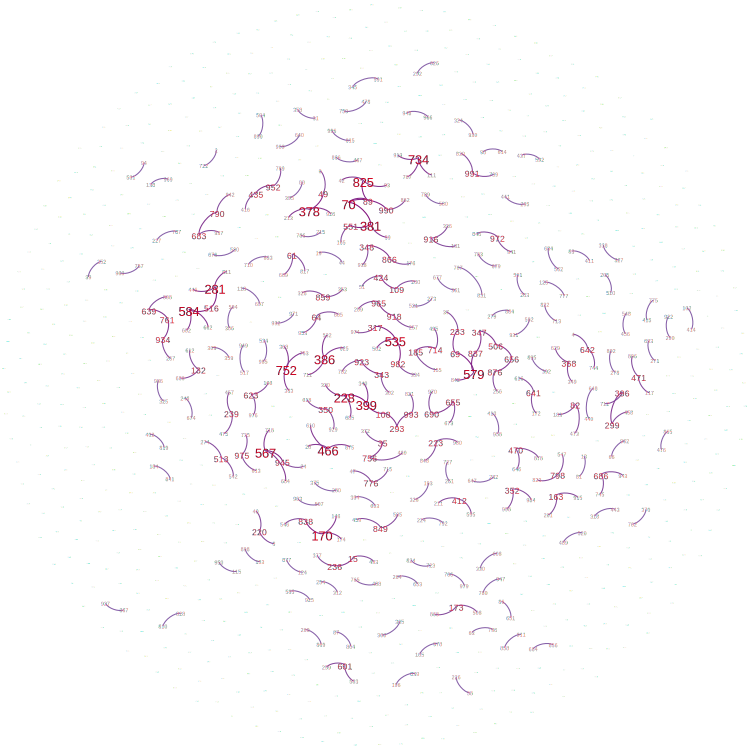

In [3]:
SVG(filename='images/graph1.svg')

# Visualization with p = 1.0/n

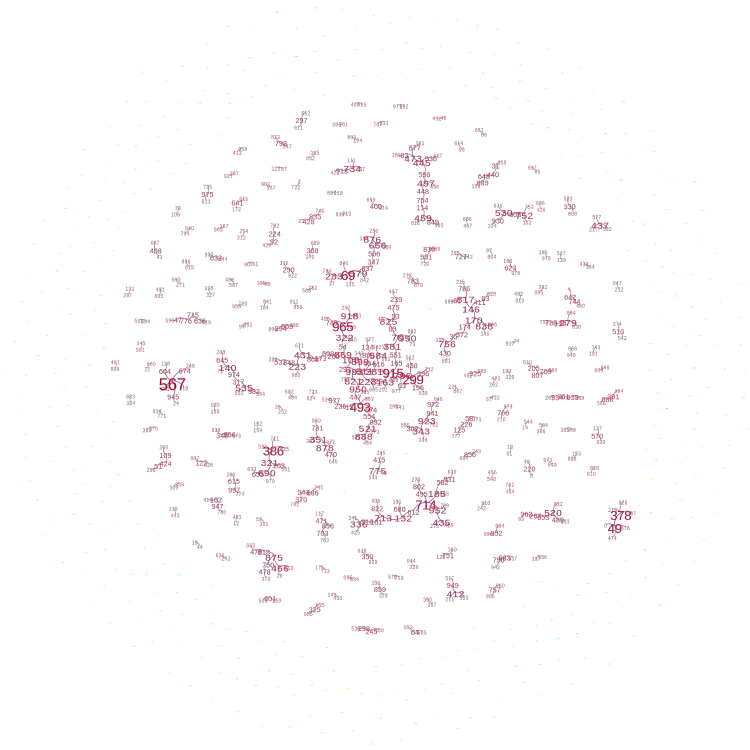

In [6]:
SVG(filename='images/graph2.svg')

# Visualization with p = 1.5/n

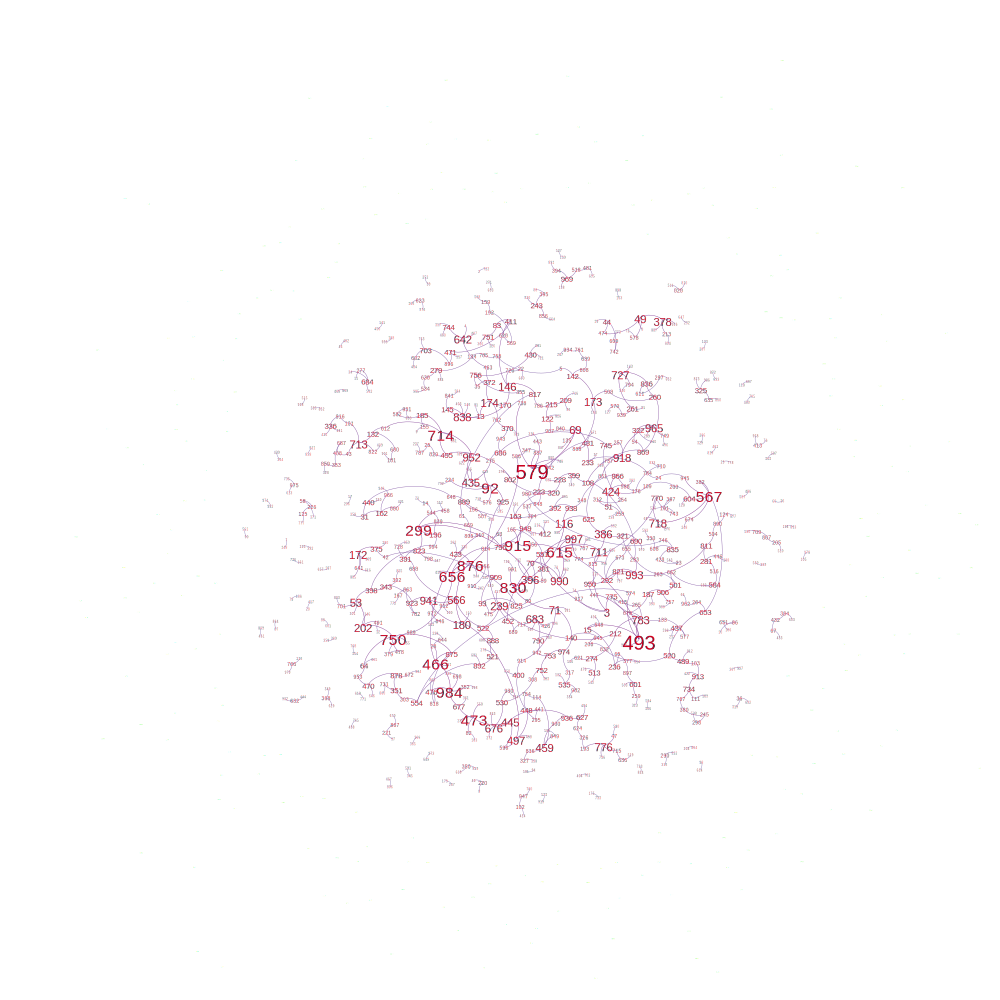

In [5]:
SVG(filename='images/graph3.svg')

## We can see that we do not see a $\alpha$-connected component with $p<1/n$, but it starts to appear with $p=1/n$ and $p>1/n$, as the theory predicts for a ERRG.

# Visualization with p = 0.5*ln(n)/n

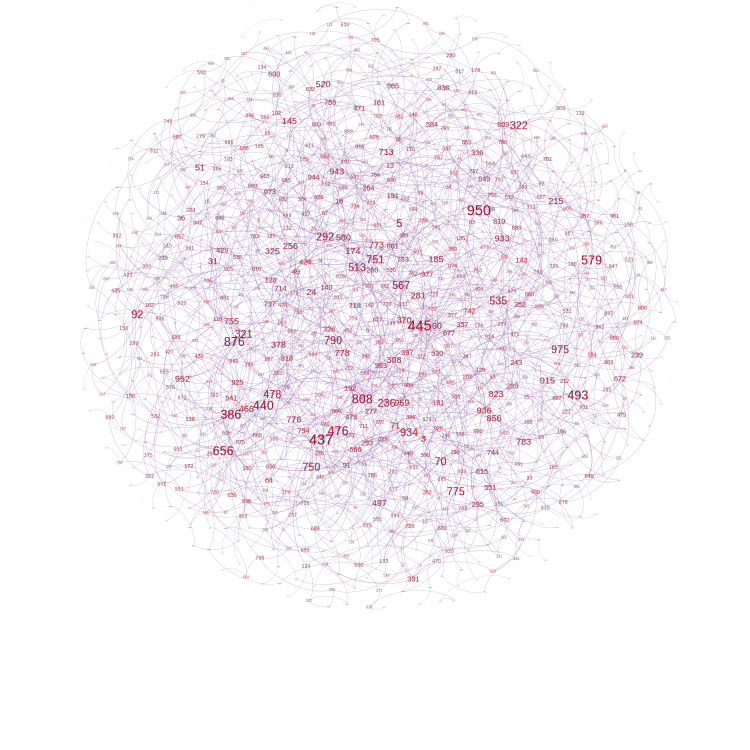

In [9]:
SVG(filename='images/graph4.svg')

# Visualization with p = 1.0*ln(n)/n

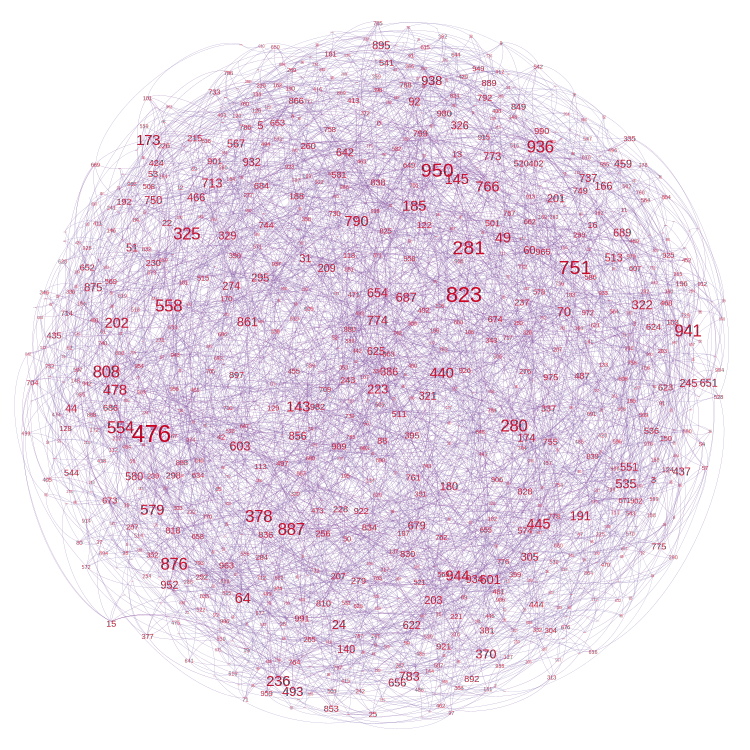

In [8]:
SVG(filename='images/graph5_2.svg')

# Visualization with p = 1.5*ln(n)/n

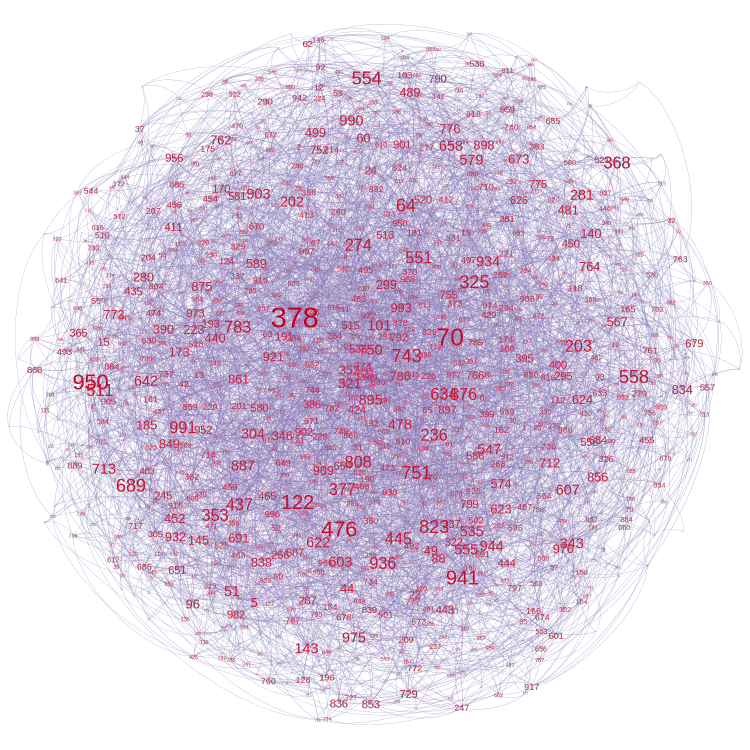

In [7]:
SVG(filename='images/graph6.svg')

## We can see that we do not see a fully-connected graph with $p<ln(n)/n$, but it starts to appear with $p=ln(n)/n$ and $p>ln(n)/n$, as the theory predicts for a ERRG.

### Use NetworkX to find the size of the largest connected component in each of the above graphs. (Hint: Use connected_component_subgraphs method.)

In [149]:
pstr=["0.5/n","1.0/n","1.5/n","0.5*ln(n)/n","1.0*ln(n)/n","1.5*ln(n)/n"]
for i,j,k in zip(gr,p,pstr):
    temp=list(nx.connected_component_subgraphs(i))
    print "The size of the largest connected component with n = 1000, p = ",str(j)," (", k ,") is "+str(temp[0].order())

The size of the largest connected component with n = 1000, p =  0.0005  ( 0.5/n ) is 5
The size of the largest connected component with n = 1000, p =  0.001  ( 1.0/n ) is 8
The size of the largest connected component with n = 1000, p =  0.0015  ( 1.5/n ) is 15
The size of the largest connected component with n = 1000, p =  0.00345387763949  ( 0.5*ln(n)/n ) is 961
The size of the largest connected component with n = 1000, p =  0.00690775527898  ( 1.0*ln(n)/n ) is 1000
The size of the largest connected component with n = 1000, p =  0.0103616329185  ( 1.5*ln(n)/n ) is 1000


### Repeat the previous part for a few more sets of ERRG. What do you observe? Can you find a relation between the value of the parameter of ERRG and the existence of a giant component? What about the connectivity of the graph?

# Answer :
### We can see that there is a phase-change threshold for the existence of an giant $\alpha$-connected component and a fully-connected component, which are c=1 and c=ln(n), where p=c/n respectively. If p>1/n, we get a giant component, and if p>ln(n)/n, we get a fully-connected component. 
### The thresholds might not be exactly perfect in the case of n=1000, but become narrower, as $n \rightarrow \infty$

In [163]:
n_e=1000
p_e=[0.1/n,0.75/n,1.01/n,10.0/n,0.1*math.log(n)/n,0.8*math.log(n)/n,1.01*math.log(n)/n,10.0*math.log(n)/n]
ps_e=["0.1/n","0.7/n","1.01/n","10.0/n","0.1*math.log(n)/n","0.5*math.log(n)/n","1.01*math.log(n)/n","10.0*math.log(n)/n"]
for i,j in zip(p_e,ps_e):
    temp=nx.erdos_renyi_graph(n,i,seed=256,directed=False)
    temp1=list(nx.connected_component_subgraphs(temp))
    print "The size of the largest connected component with n = 1000, p = ",str(i)," (", j ,") is "+str(temp1[0].order())

The size of the largest connected component with n = 1000, p =  0.0001  ( 0.1/n ) is 1
The size of the largest connected component with n = 1000, p =  0.00075  ( 0.7/n ) is 7
The size of the largest connected component with n = 1000, p =  0.00101  ( 1.01/n ) is 8
The size of the largest connected component with n = 1000, p =  0.01  ( 10.0/n ) is 1000
The size of the largest connected component with n = 1000, p =  0.000690775527898  ( 0.1*math.log(n)/n ) is 6
The size of the largest connected component with n = 1000, p =  0.00552620422319  ( 0.5*math.log(n)/n ) is 999
The size of the largest connected component with n = 1000, p =  0.00697683283177  ( 1.01*math.log(n)/n ) is 1000
The size of the largest connected component with n = 1000, p =  0.0690775527898  ( 10.0*math.log(n)/n ) is 1000


### Plot the degree distribution and the normalized degree distribution for each of these graphs.

# Answer
### We can see that the degree distribution becomes more and more Gaussian as $ np = \lambda$ increases.

The degree distributions for ERRG with n=1000 and p= 0.5/n  is :


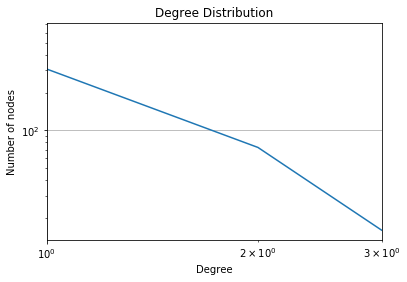

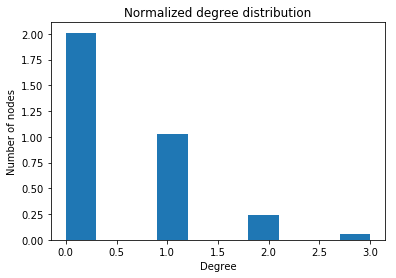

Average degree =  0.502



The degree distributions for ERRG with n=1000 and p= 1.0/n  is :


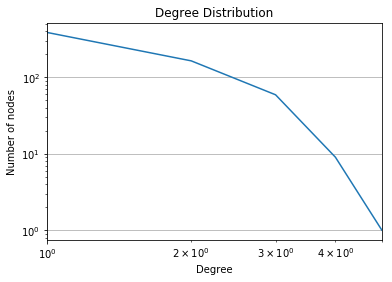

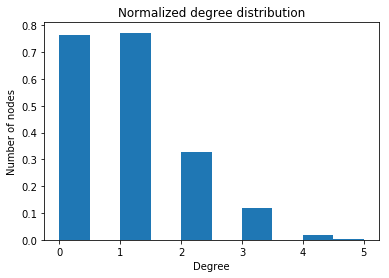

Average degree =  0.932



The degree distributions for ERRG with n=1000 and p= 1.5/n  is :


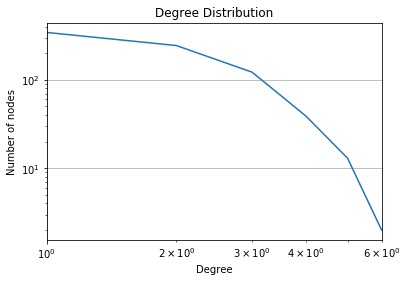

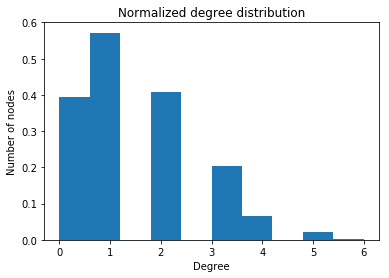

Average degree =  1.43



The degree distributions for ERRG with n=1000 and p= 0.5*ln(n)/n  is :


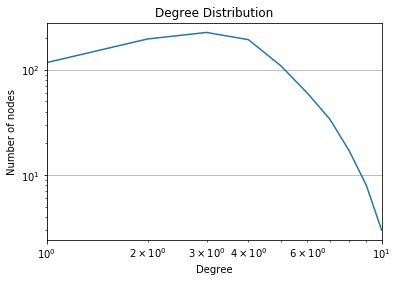

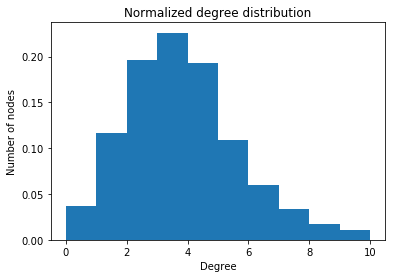

Average degree =  3.34



The degree distributions for ERRG with n=1000 and p= 1.0*ln(n)/n  is :


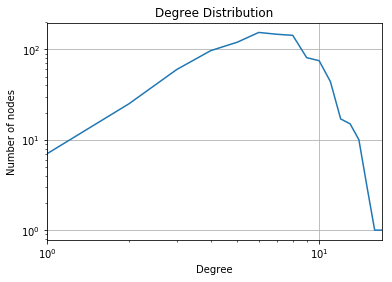

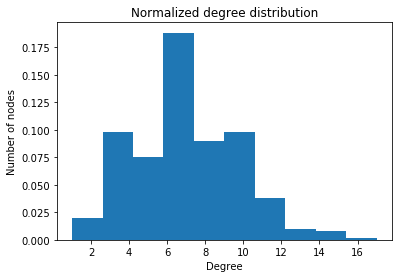

Average degree =  6.902



The degree distributions for ERRG with n=1000 and p= 1.5*ln(n)/n  is :


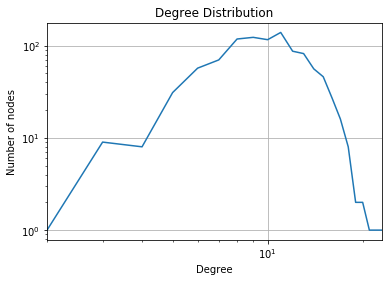

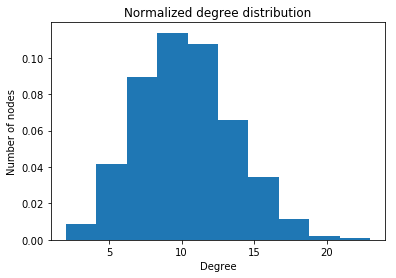

Average degree =  10.342





In [244]:
for i,j in zip(gr,pstr):
    print "The degree distributions for ERRG with n=1000 and p=",j," is :"
    deg_dist(i,normalized=1)
    print "\n\n"

### Use NetworkX to calculate the diamater and average shortest path length for these graphs. Also plot the clustering coefficient for the nodes of these graphs. 

In [76]:
#network diameter and average shortest path length
def conn_dia(g1):
    connected=nx.is_connected(g1)
    if connected is True:
        diameter=nx.diameter(g1)
        print "Network diameter=",diameter
        aspl=nx.average_shortest_path_length(g1)
        print "Average Shortest path length=",aspl
    else:
        print "Graph is not connected. Finding attributes of the largest connected component :"
        g2=list(nx.connected_component_subgraphs(g1))[0]
        diameter=nx.diameter(g2)
        print "Network diameter=",diameter
        aspl=nx.average_shortest_path_length(g2)
        print "Average Shortest path length=",aspl

In [77]:
def plot_clust(g1):
    cc=nx.clustering(g1)
    mean_cl=np.mean(cc.values())
    print "Average Clusterng Coefficient = ",mean_cl
    if(mean_cl==0):
        print "Clustering coefficient is zero for all nodes"
    else:
        cc_values = sorted(set(cc.values()))
        cc_hist = [cc.values().count(x) for x in cc_values]    
        plt.figure()
        plt.grid(True)
        plt.plot(cc_values, cc_hist)
        plt.xlabel('Clustering Coefficient')
        plt.ylabel('Number of nodes')
        plt.title('Facebook Network Clustering Coefficient distribution')
        plt.xlim([0, 1])
        plt.show()
        plt.close()
    print "\n"

For the graph with n=1000, p = 0.5/n  :
Graph is not connected. Finding attributes of the largest connected component :
Network diameter= 3
Average Shortest path length= 1.8
Average Clusterng Coefficient =  0.0
Clustering coefficient is zero for all nodes


For the graph with n=1000, p = 1.0/n  :
Graph is not connected. Finding attributes of the largest connected component :
Network diameter= 3
Average Shortest path length= 2.07142857143
Average Clusterng Coefficient =  0.0
Clustering coefficient is zero for all nodes


For the graph with n=1000, p = 1.5/n  :
Graph is not connected. Finding attributes of the largest connected component :
Network diameter= 8
Average Shortest path length= 3.48571428571
Average Clusterng Coefficient =  0.0
Clustering coefficient is zero for all nodes


For the graph with n=1000, p = 0.5*ln(n)/n  :
Graph is not connected. Finding attributes of the largest connected component :
Network diameter= 14
Average Shortest path length= 5.72470950399
Average Cluster

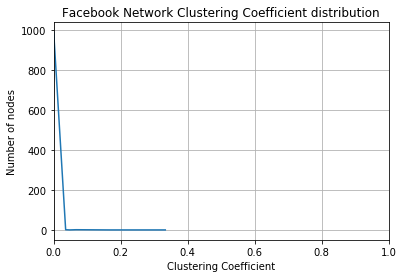



For the graph with n=1000, p = 1.0*ln(n)/n  :
Network diameter= 7
Average Shortest path length= 3.78734134134
Average Clusterng Coefficient =  0.00667251637252


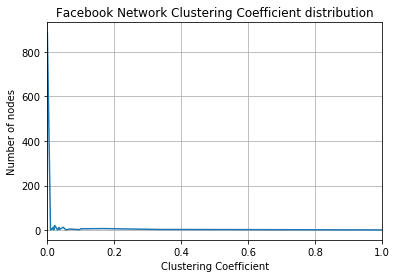



For the graph with n=1000, p = 1.5*ln(n)/n  :
Network diameter= 5
Average Shortest path length= 3.21344744745
Average Clusterng Coefficient =  0.0110592552159


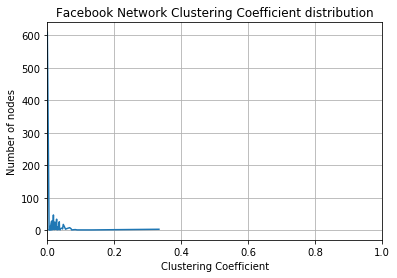

In [265]:
for i,j in zip(gr,pstr):
    print "For the graph with n=1000, p =",j," :"
    conn_dia(i)
    plot_clust(i)

## Task 2: Preferential Attachment - Barabasi-Albert Random Graphs

### Using NetworkX generate four Barabasi-Albert Random Graphs (BARGs) with n = 1000, 10000 nodes and with parameter m = 2 , 5.  

In [5]:
n=[1000,10000]
m=[2,5]
grb=defaultdict()
for i in n:
    for j in m:
        grb[(i,j)]=nx.barabasi_albert_graph(i,j)

In [270]:
for i in n:
    for j in m:
        path='barg graphs/graph_barg_n'+str(i)+'_m_'+str(j)+'.gml'
        nx.write_gml(grb[(i,j)],path)

### Use NetworkX to store the graphs in .gml and then visualize them using Gephi such that each node has a size proportional to its degree (also its color is related to its degree). Include your visualizations in SVG format in your notebook. Do you see an interesting property for these graphs? Explain your answer. Repeat this question for the graphs in Task 1 and compare the results.

# Answer 
### From the visualizations below, we can see that in the graphs generated by the BARG model, a few nodes that the most importance, with very high node degree. Since it is a PA model, we can say that these might be the ancestor nodes from which the  PA started with. This model does not have any engineering insight, although it might produce the power law.

### We already saw the graphs in Task 1 above, and from them we can see that there is notion of the most important nodes. Although some nodes carry some higher importance, they do not dominate the network since it is a random graph.

### <span style="color:red"> The nodes are not rendered properly in the svg images. It is a live request at https://github.com/gephi/gephi/issues/1759. So I am including png files as support in addition to the SVG images. </span>

# Visualization with m=2, n=1000

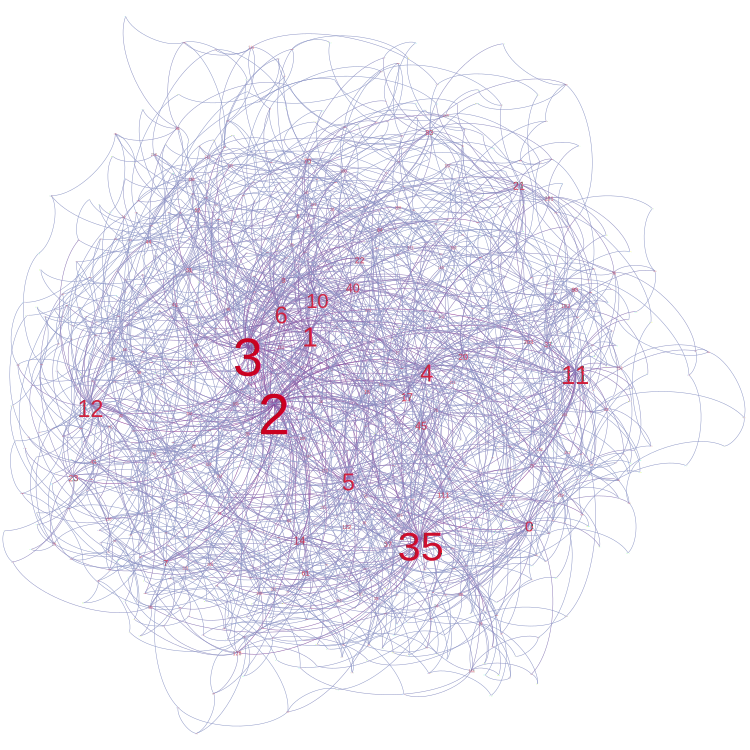

In [10]:
SVG(filename='barg_images/barg21000.svg')

![title](barg_images/barg21000.png)

# Visualization with m=5, n=1000

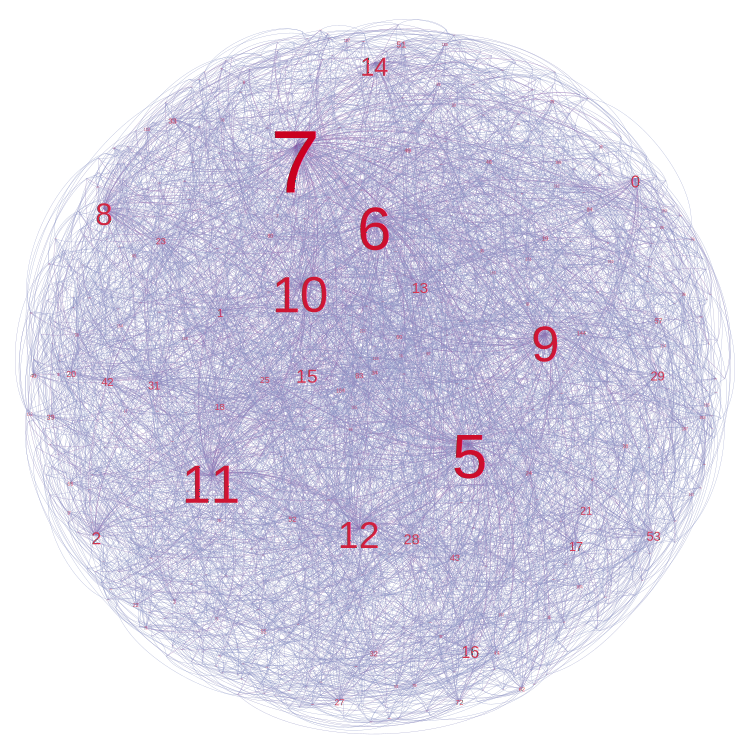

In [11]:
SVG(filename='barg_images/barg51000.svg')

![title](barg_images/barg51000.png)

# Not able to print svg files for n=10000. Using png files

# Visaulization with n=10000, m=2

In [12]:
SVG(filename='barg_images/barg210000.svg')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


![title](barg_images/barg210000.png)

# Visualization for n=10000, m=5

![title](barg_images/barg510000.png)

## Task 3: Small World Model (Watts–Strogatz)

### Using NetworkX generate three Watts-Strogatz Random Graphs (WSRGs) with n = 1000 nodes and with parameters k = 5, and p = 0.2, 0.5, and 0.8.

In [19]:
n=1000
k=5
p=[0.2,0.5,0.8]
grws=defaultdict()
for i in p:
    grws[i]=(nx.watts_strogatz_graph(n, k, i, seed=256))

### Use NetworkX to store the graphs in .gml and then visualize them using Gephi. Include your visualizations in SVG format in your notebook.

In [20]:
for i in p:
    path='gr_ws/ws_'+str(i)+'.gml'
    nx.write_gml(grws[i],path)

# Visualization of p=0.2 model

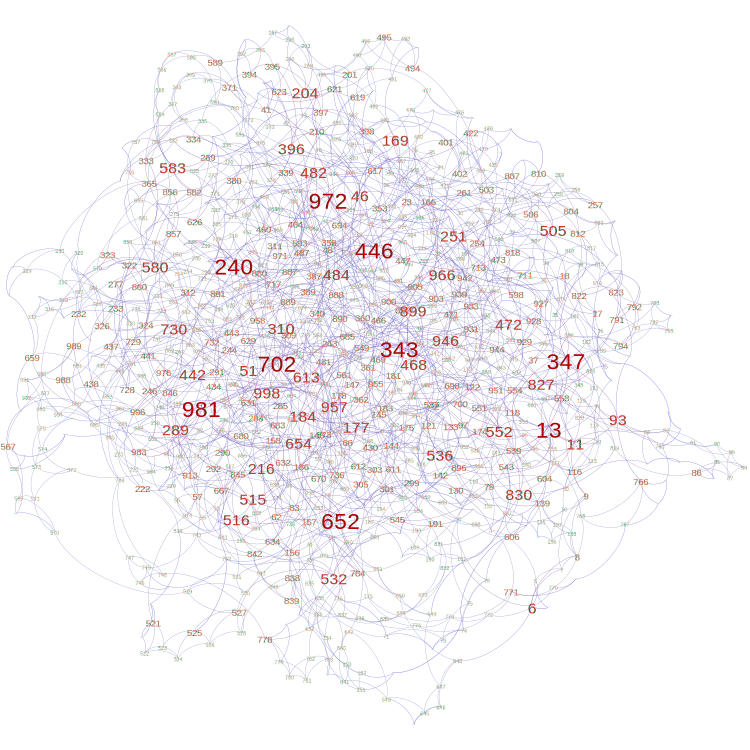

In [15]:
SVG(filename='ws_images/ws2.svg')

# Visualization of p=0.5 model

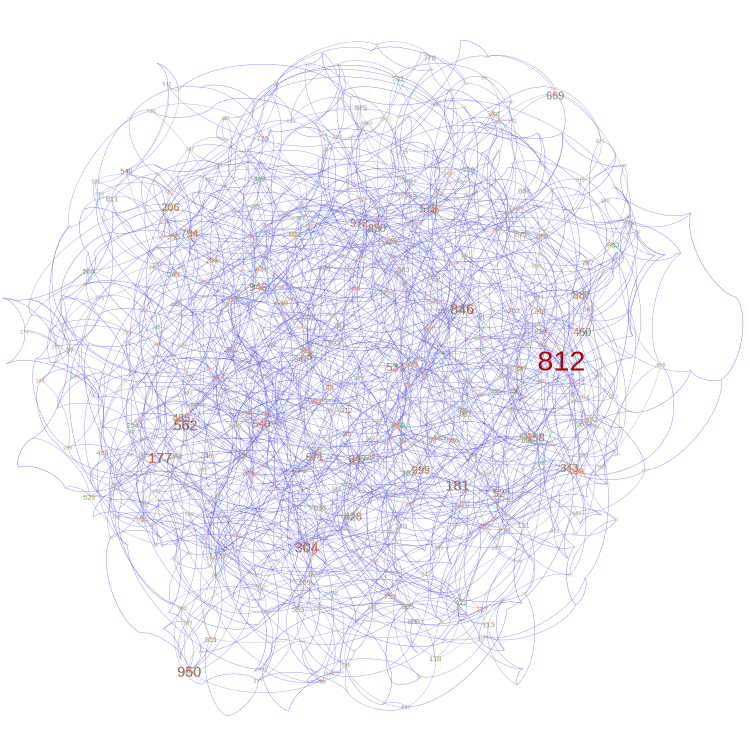

In [14]:
SVG(filename='ws_images/ws5.svg')

# Visualization of p=0.8 model

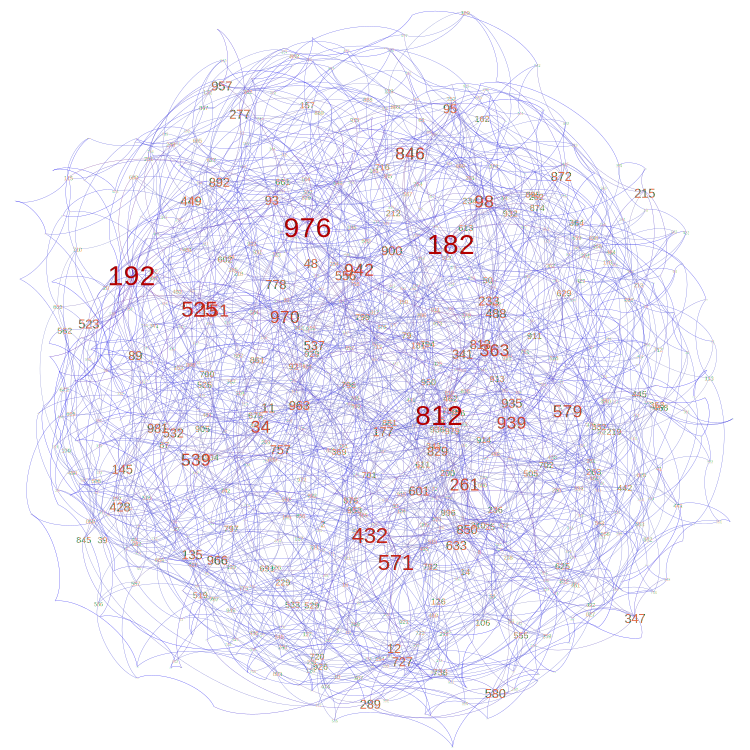

In [13]:
SVG(filename='ws_images/ws8.svg')

### Plot the degree distibution and the noramlized degree distributions of these graphs in arithmetic and log-log scale figures. Based on these plots, can you make a guess about the distribution of these graphs? Explain your answer.

# Answer 
### We can see that it has an exponential degree distribution, and it makes sense since it is a random graph. It displays the exponential nature with increasing p. For p=0, it would be a dirac delta centered at K, and as p increases it follows a Poisson distribution

# Degree distribution for p=0.2 graph

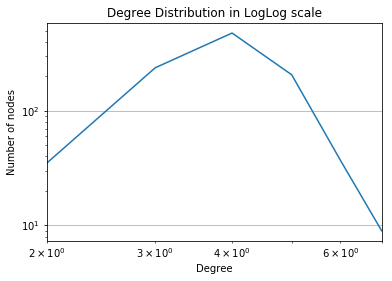

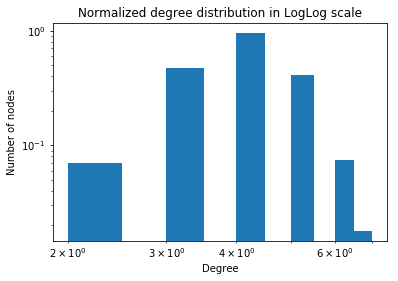

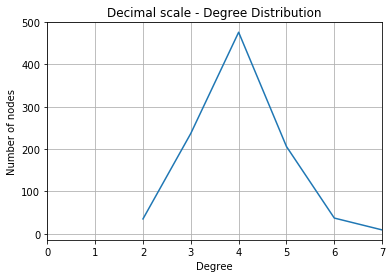

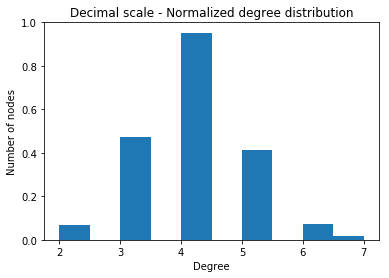

Average degree =  4.0


In [72]:
deg_dist(grws[0.2],normalized=1,loglog=1)

# Degree distribution for p=0.5 model

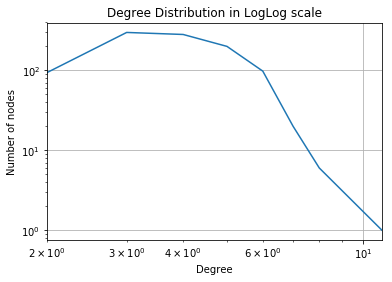

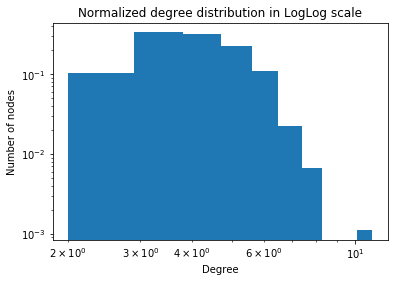

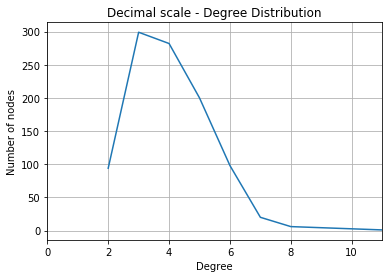

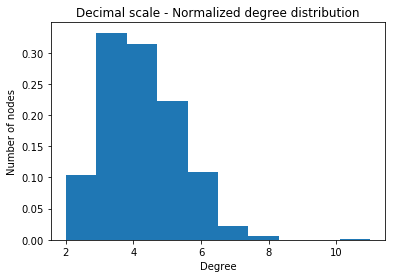

Average degree =  4.0


In [73]:
deg_dist(grws[0.5],normalized=1,loglog=1)

# Degree distribution for p=0.8 model

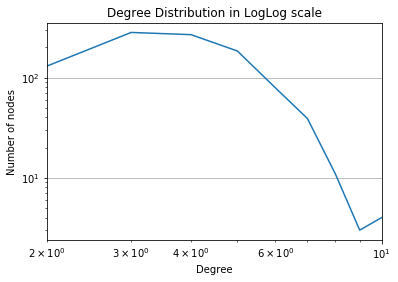

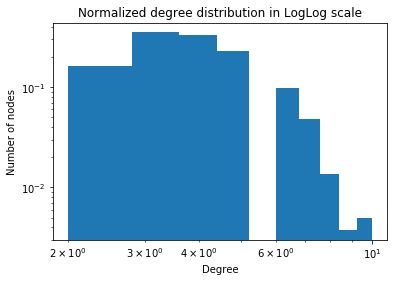

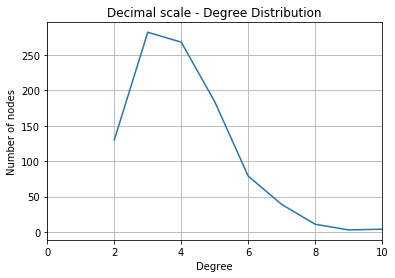

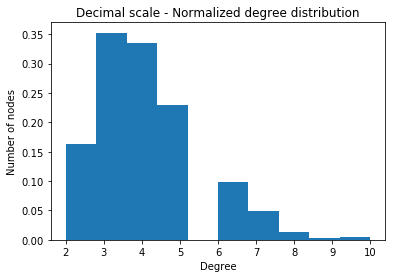

Average degree =  4.0


In [74]:
deg_dist(grws[0.8],normalized=1,loglog=1)

### Calculate the diamater and average shortest path length for these graphs. Also plot the clustering coefficient for the nodes of these graphs. Compare these results with previous results. Based on this comparison, which one of these models is a better choice for describing an online social network in your opinion? Explain your answer.

# Answer :
### We can see that the Watts-Strogatz model tries to satisfy the small-world properties of the social network. Although it does lack the power-law distribution, it does have the high clustering seen in real networks which the ERRG and BARG networks lack. But all the models show the small world property of small diameter and average shortest path length.

### Each model has its own advantage and none of these models are realistic in capturing all of the online social-network properties. As for the best choice in hand, it is the Watts-Strogatz model.

For the graph with n=1000, k=5, p= 0.2  :
Network diameter= 9
Average Shortest path length= 5.57001401401
Average Clusterng Coefficient =  0.0662474025974


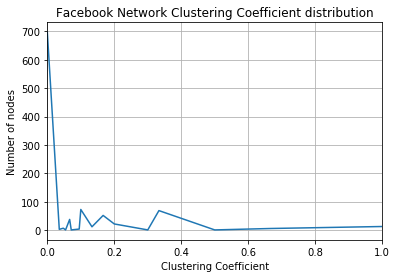



For the graph with n=1000, k=5, p= 0.5  :
Network diameter= 9
Average Shortest path length= 5.32454254254
Average Clusterng Coefficient =  0.00609523809524


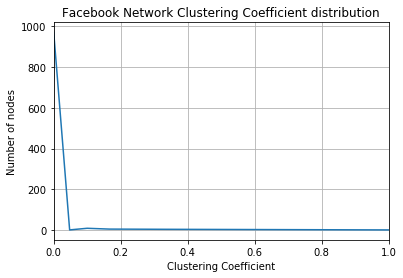



For the graph with n=1000, k=5, p= 0.8  :
Network diameter= 12
Average Shortest path length= 6.81098498498
Average Clusterng Coefficient =  0.26049047619


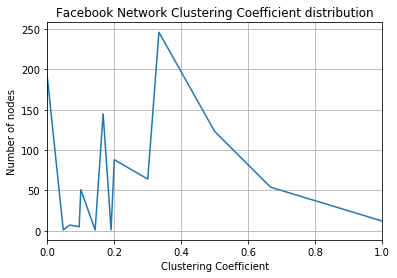

In [79]:
for k,j in zip(grws,p):
    print "For the graph with n=1000, k=5, p=",j," :"
    i=grws[k]
    conn_dia(i)
    plot_clust(i)

## In the next part of HW we are going to find the best probability distribution that fits the actual degree distributions of three graphs whose adjacency matrices/edge lists are given.

## Task 4

### 1) Run the following code to import the necessary libraries and then read the adjacency list of graph G1 from its file and print the graph information using NetworkX library. Define the variable 'n' as the number of nodes in the graph.

In [13]:
# Importing NetworkX and useful libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import powerlaw as splaw
from scipy.stats import norm
from scipy.stats import laplace
from scipy.stats import expon
from scipy.stats import binom
import scipy.integrate as integrate
import powerlaw

In [5]:
# Reading a Barabasi-Albert graph with parameters n and m
gr_adj=nx.read_adjlist('data/G1.adjlist',create_using=nx.Graph(),comments='#',nodetype=int)

In [6]:
# Printing the basic information of the graph
print nx.info(gr_adj)
n=gr_adj.order()

Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 4975
Average degree:   9.9500


### 2) Plot:    a) The degree distribution of the graph with arithmetic and log-log scales.    b) The normalized degree distribution of the graph.

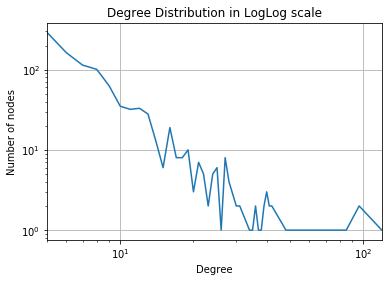

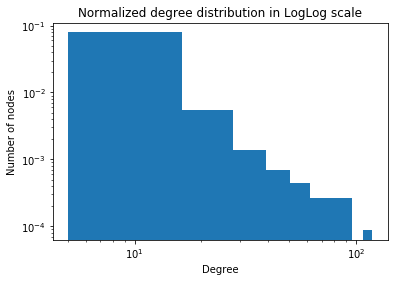

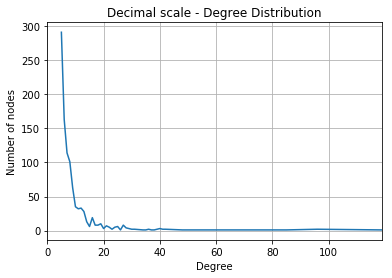

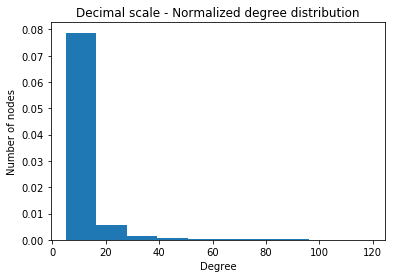

Average degree =  9.95


In [7]:
# Plotting the degree distribution
deg_dist(gr_adj,normalized=1,loglog=1)

### 3) Use SciPy stat library to find the parameters of the best Laplace and Normal distributions that fit the degree sequence of the graph. 

In [8]:
# Finding the best fit for degree distribution of the graph
# We are going to postpone the Binomial fitting to 
ad_hist=deg_hist(gr_adj)
ll,sl=laplace.fit(ad_hist)
print "The fitted laplace distribution parameters are - mu = ",ll," and b = ",sl,"\n"
ln,sn=norm.fit(ad_hist)
print "The fitted normal distribution parameters are - mean = ",ln," and sd = ",sn,"\n"

The fitted laplace distribution parameters are - mu =  7.0000000063  and b =  4.44000266282 

The fitted normal distribution parameters are - mean =  9.95  and sd =  10.1979164539 



### 4) Use the powerlaw library to find the alpha parameter of the best power_law distribution that fits the degree sequence of G1. Store the minimum value of the degree sequence of G1 in 'xmin' variable and the alpha in 'alpha' variable.

In [9]:
# EXTRA: Install powerlaw library with "pip install powerlow"
! pip install powerlaw
import powerlaw

The directory '/home/jovyan/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/jovyan/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.


In [11]:
plaw = powerlaw.Fit(data=ad_hist)
xmin=plaw.xmin
alpha=plaw.alpha
print "The power law parameters that best describe the distribution are - alpha = ",alpha," and xmin = ",xmin

The power law parameters that best describe the distribution are - alpha =  3.06913823222  and xmin =  7.0


Calculating best minimal value for power law fit


### 5) Define a power-law function which accepts an input 'x' and two parameters 'xmin' and 'alpha' as its parameters. Also define two functions called MSE and KL which calculate the mean squared error and the KL divergence between two given on dimentional arrays.

In [87]:
## Defining powerlaw functions
def plawfn(x,xmin,alpha):
    return (alpha-1)*1.0/xmin*((x*1.0/xmin)**(-alpha))

def mse(x,y):
    return np.square(np.subtract(x,y)).mean()

def kl(a,b):
    a = np.asarray(a, dtype=np.float)
    b = np.asarray(b, dtype=np.float)

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))

### 6) Since the probability distributions we are working with are continuous while the degree distribution is discrete, we need to find an estimated discrete version of these distributions. Use the power-law function defined above and the pdf functions of the distributions mentioned above in SciPy to find a discrete version of the the distributions by calculating the integral from each integer value to the next integer value for the probability mass of the first integer. For example, here we need to integrate for each of the possible values of the degree sequence to the next integer number and store it in an array.

In [71]:
def lap(x,u,b):
    return 0.5/b*math.exp(-1.0*abs(x-u)/b)
def gau(x,u,s):
    return 1/s/((2*math.pi)**0.5)*math.exp(-((x-u)**2)/2/(s**2))

In [96]:
m=max(ad_hist)
dis_lap=defaultdict()
dis_norm=defaultdict()
dis_plaw=defaultdict()
for i in range(6,m+1):
    j=i+1
    dis_lap[i] = integrate.quad(lap,i,j,args=(ll,sl,))[0] 
    #laplace.cdf(j,loc=ll,scale=sl)-laplace.cdf(i,loc=ll,scale=sl)
    dis_norm[i] = integrate.quad(gau,i,j,args=(ln,sn,))[0] 
    # dis_norm[i] = norm.cdf(j,loc=ln,scale=sn)-norm.cdf(i,loc=ln,scale=sn)
    dis_plaw[i] = integrate.quad(plawfn,i,j,args=(xmin,alpha,))[0] 
    # dis_plaw[i] = plawfn(i,xmin=xmin,alpha=alpha)

# Ignore
##Estimating a discrete distribution for each of the continuous distributions -Method 2?
m=max(ad_hist)
dis_lap=defaultdict()
dis_norm=defaultdict()
dis_plaw=defaultdict()
for i in range(1,m+1):
    j=i+1
    dis_lap[i] = laplace.cdf(j,loc=ll,scale=sl)-laplace.cdf(i,loc=ll,scale=sl)
    dis_norm[i] = norm.cdf(j,loc=ln,scale=sn)-norm.cdf(i,loc=ln,scale=sn)
    dis_plaw[i] = plawfn(i,xmin=xmin,alpha=alpha)

### 7) In this part you are supposed to calculate the MSE and KL divergence between the actual degree distribution and the estimated discrete distributions and state which probability distributions fits the actual distribution based on these two criterias, i.e., MSE and KL divergence. Also explain which of these two criteria is a better choice in your opinion.

In [85]:
# Comparing the MSE and KL divergence for different distributions
orig_dist=defaultdict()
for i in ad_hist:
    orig_dist[i]=ad_hist.count(i)*1.0/len(ad_hist)

In [102]:
laplist=[]
pllist=[]
normlist=[]
orig_list=[]
orig_keys=[]
for i in orig_dist:
    if i>xmin:
        laplist.append(dis_lap[i])
        pllist.append(dis_plaw[i])
        normlist.append(dis_norm[i])
        orig_list.append(orig_dist[i])
        orig_keys.append(i)
print "Laplace distribution :"
print "MSE: ",mse(orig_list,laplist)
print "KL : ",kl(orig_list,laplist),"\n"

print "Normal distribution :"
print "MSE: ",mse(orig_list,normlist)
print "KL: ",kl(orig_list,normlist),"\n"

print "Power law distribution :"
print "MSE: ",mse(orig_list,pllist)
print "KL: ",kl(orig_list,pllist)

Laplace distribution :
MSE:  2.43488970526e-05
KL :  0.24703195654 

Normal distribution :
MSE:  0.000178115333402
KL:  0.28453584387 

Power law distribution :
MSE:  0.000254016937911
KL:  -0.185676985912


# Answer
### We can see that even though the Laplcaian and the normal distribution have a better MSE error, it is dependent on the values of the counts. When comparing distribution KL divergence is a better measure, since the expectation of a distribtion given another is a true mark of similarity, and not equivalance of a sampled set of probabilities.

### Hence, in this case we can state that the given graph follows a power law.

### 8) Plot the actual degree distribution along with the estimated discrete distribution for each of the above-mentioned distributions on an arithmatic and log-log scale figure. Which distributions fits the actual degree distribution better? Explain your answer.

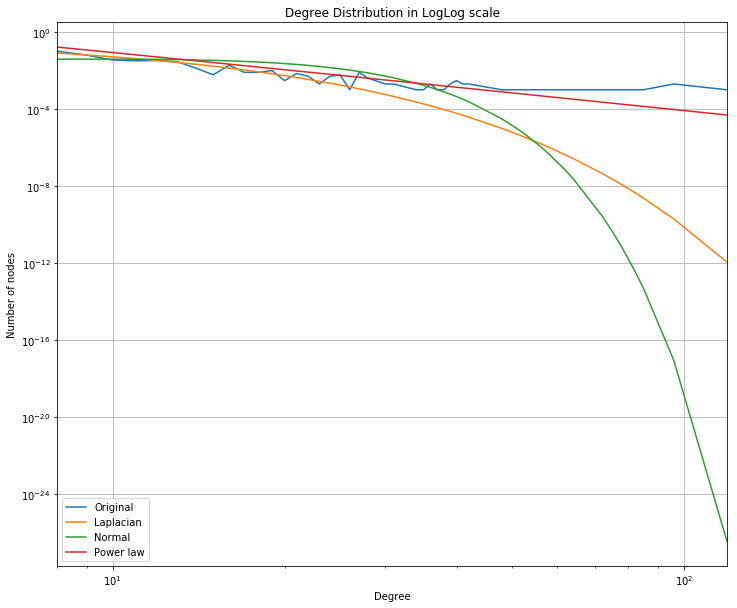

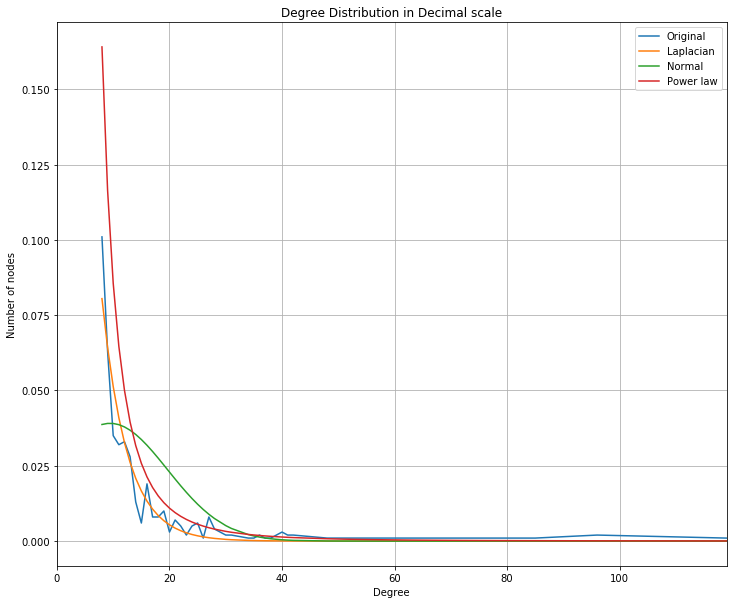

In [110]:
# Plotting degree distribution - LogLog Scale
plt.figure(figsize=(12,10))
plt.grid(True)
for i in [orig_list,laplist,normlist,pllist]:
    plt.loglog(orig_keys, i) #degree
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree Distribution in LogLog scale')
plt.xlim([0, max(orig_keys)])
plt.legend(['Original','Laplacian','Normal','Power law'])
plt.show()
plt.close()

# Plotting degree distribution - Decimal scale
plt.figure(figsize=(12,10))
plt.grid(True)
for i in [orig_list,laplist,normlist,pllist]:
    plt.plot(orig_keys, i) #degree
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree Distribution in Decimal scale')
plt.xlim([0, max(orig_keys)])
plt.legend(['Original','Laplacian','Normal','Power law'])
plt.show()
plt.close()

# Answer :
### We can see that the Power law fits the original distribution near-perfectly, as it more closely follows the original plot. This also follows from the fact that the adjacency list given was generated from a BARG model which is known to generate a power law.

### 9) Repeat the previous part by using SciPy library continious PDFs instead of the estimated discrete distributions.

In [111]:
# Plotting the distributions

m=max(ad_hist)
dis_lap1=defaultdict()
dis_norm1=defaultdict()
dis_plaw1=defaultdict()
for i in range(6,m+1):
    j=i+1
    dis_lap1[i] = laplace.pdf(i,loc=ll,scale=sl)
    dis_norm1[i] = norm.pdf(i,loc=ln,scale=sn)
    dis_plaw1[i] = plawfn(i,xmin=xmin,alpha=alpha)

In [113]:
laplist1=[]
pllist1=[]
normlist1=[]
orig_list1=[]
orig_keys1=[]
for i in orig_dist:
    if i>xmin:
        laplist1.append(dis_lap1[i])
        pllist1.append(dis_plaw1[i])
        normlist1.append(dis_norm1[i])
        orig_list1.append(orig_dist[i])
        orig_keys1.append(i)
print "Laplace distribution :"
print "MSE: ",mse(orig_list1,laplist1)
print "KL : ",kl(orig_list1,laplist1),"\n"

print "Normal distribution :"
print "MSE: ",mse(orig_list1,normlist1)
print "KL: ",kl(orig_list1,normlist1),"\n"

print "Power law distribution :"
print "MSE: ",mse(orig_list1,pllist1)
print "KL: ",kl(orig_list1,pllist1)

Laplace distribution :
MSE:  2.86466552204e-05
KL :  0.199296025546 

Normal distribution :
MSE:  0.000188872906492
KL:  0.272573703432 

Power law distribution :
MSE:  0.000480073879301
KL:  -0.239923171217


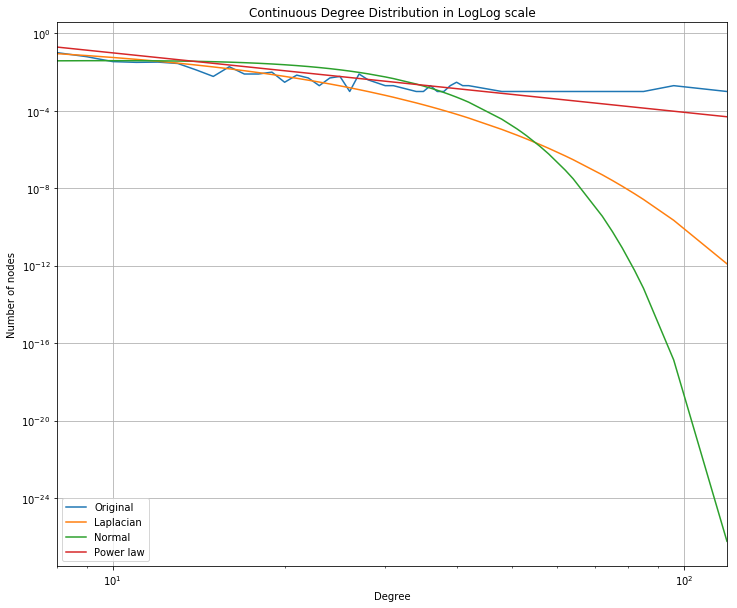

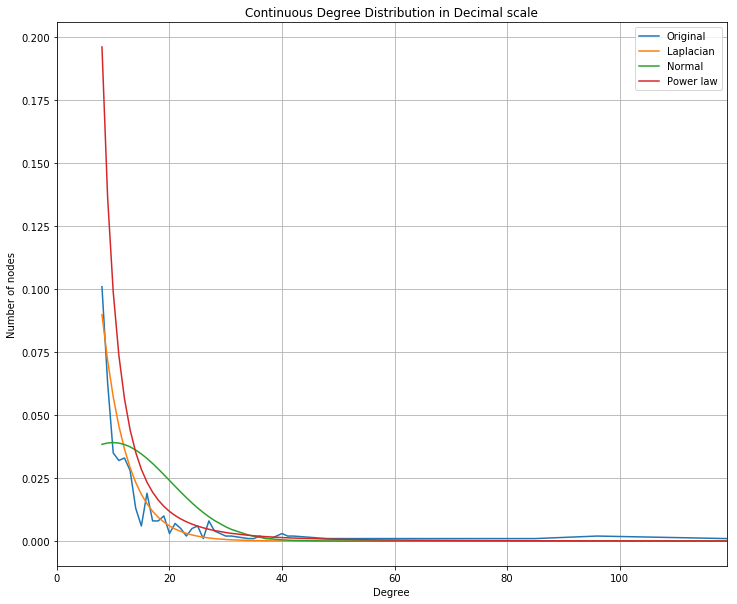

In [114]:
# Plotting degree distribution - LogLog Scale
plt.figure(figsize=(12,10))
plt.grid(True)
for i in [orig_list1,laplist1,normlist1,pllist1]:
    plt.loglog(orig_keys1, i) #degree
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Continuous Degree Distribution in LogLog scale')
plt.xlim([0, max(orig_keys)])
plt.legend(['Original','Laplacian','Normal','Power law'])
plt.show()
plt.close()

# Plotting degree distribution - Decimal scale
plt.figure(figsize=(12,10))
plt.grid(True)
for i in [orig_list1,laplist1,normlist1,pllist1]:
    plt.plot(orig_keys1, i) #degree
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Continuous Degree Distribution in Decimal scale')
plt.xlim([0, max(orig_keys)])
plt.legend(['Original','Laplacian','Normal','Power law'])
plt.show()
plt.close()